In [5]:
"""
Notebook which contains the code for the figures used in the report.
"""
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# All the paths used in the notebook.
train_metrics_csv_path = "../test_all_train_slices/metrics.csv"
test_metrics_csv_path = "../test_all_test_slices/metrics.csv"

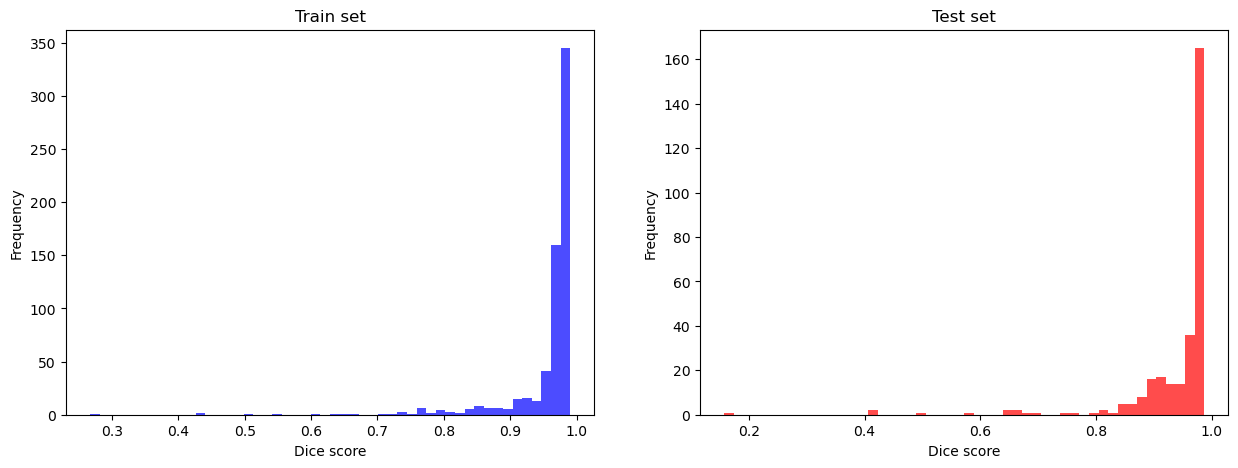

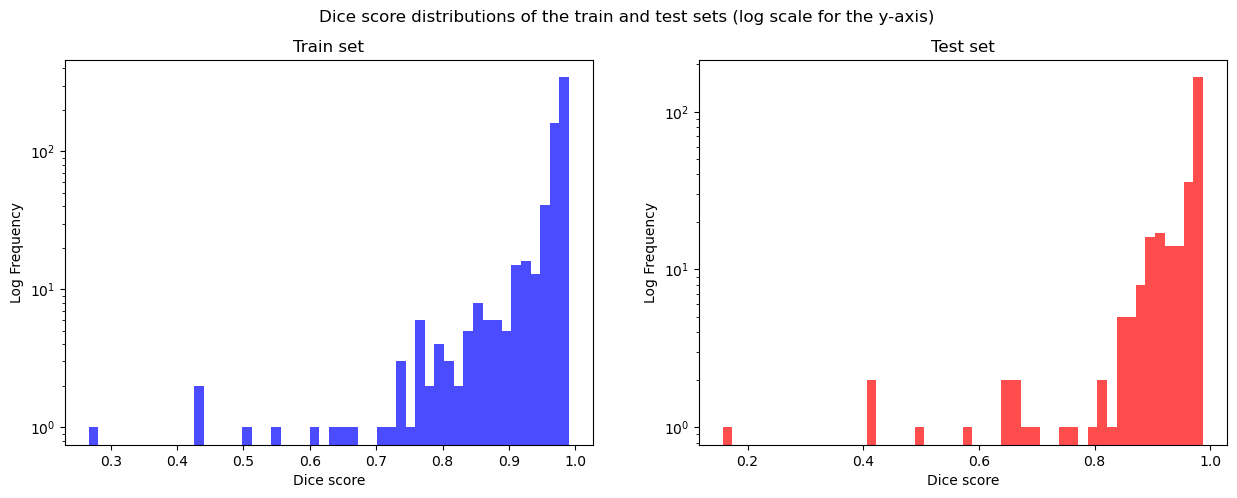

In [15]:
"""
Figure showing dice score distribution histograms of the train and test sets.
"""

train_df = pd.read_csv(train_metrics_csv_path)
test_df = pd.read_csv(test_metrics_csv_path)

# Replace 'NaN' strings with 0
train_df.replace("NaN", 0, inplace=True)
test_df.replace("NaN", 0, inplace=True)

# Drop 0 dice scores
train_df_fg_only = train_df[train_df["dice"] > 0]
test_df_fg_only = test_df[test_df["dice"] > 0]

# Plot the distributions
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(train_df_fg_only["dice"], bins=50, color="blue", alpha=0.7)
ax[0].set_title("Train set")
ax[0].set_xlabel("Dice score")
ax[0].set_ylabel("Frequency")

ax[1].hist(test_df_fg_only["dice"], bins=50, color="red", alpha=0.7)
ax[1].set_title("Test set")
ax[1].set_xlabel("Dice score")
ax[1].set_ylabel("Frequency")

# Plot the distributions with a log scale for the y-axis
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(train_df_fg_only["dice"], bins=50, color="blue", alpha=0.7)
ax[0].set_title("Train set")
ax[0].set_xlabel("Dice score")
ax[0].set_ylabel("Log Frequency")
ax[0].set_yscale("log")  # Set log scale for y-axis

ax[1].hist(test_df_fg_only["dice"], bins=50, color="red", alpha=0.7)
ax[1].set_title("Test set")
ax[1].set_xlabel("Dice score")
ax[1].set_ylabel("Log Frequency")
ax[1].set_yscale("log")  # Set log scale for y-axis

fig.suptitle(
    "Dice score distributions of the train and test sets (log scale for the y-axis)"
)
plt.show()

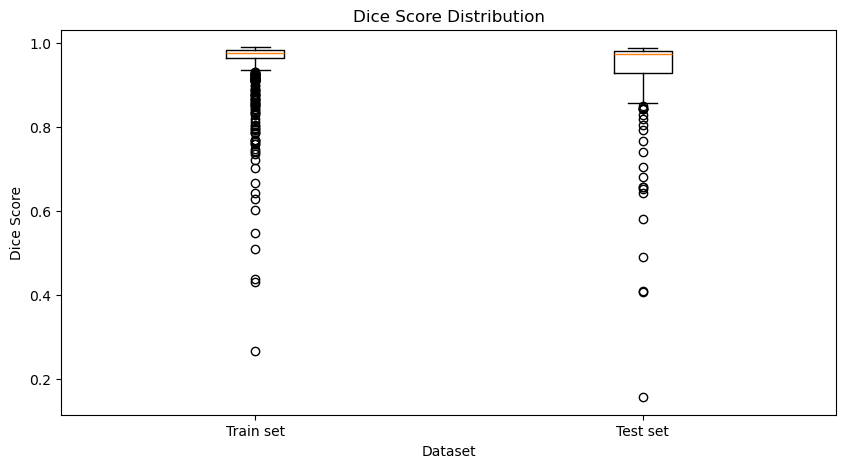

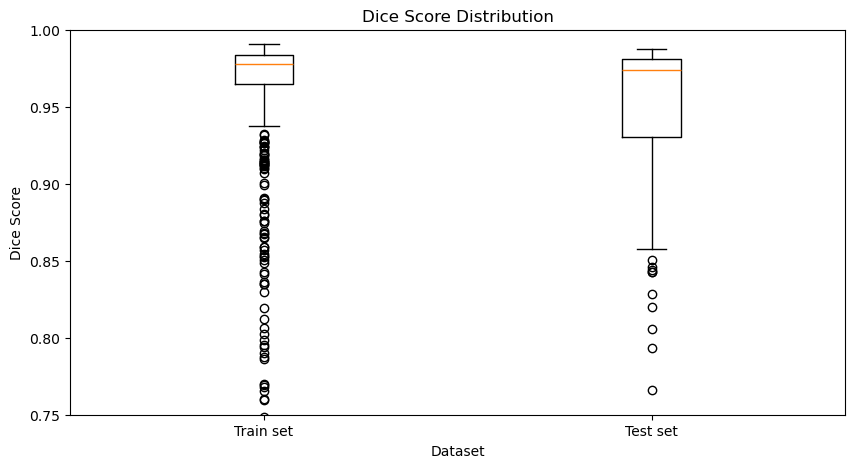

In [18]:
"""
Figure showing dice score distribution boxplots of the train and test sets.
"""

fig, ax = plt.subplots(figsize=(10, 5))

# Combine the dice scores of train and test sets
dice_scores = [train_df_fg_only["dice"], test_df_fg_only["dice"]]

# Create the boxplot
ax.boxplot(dice_scores, labels=["Train set", "Test set"])

# Set the title and labels
ax.set_title("Dice Score Distribution")
ax.set_xlabel("Dataset")
ax.set_ylabel("Dice Score")

# Show the plot
plt.show()

# Zoom in on the boxplot
fig, ax = plt.subplots(figsize=(10, 5))

# Create the boxplot
ax.boxplot(dice_scores, labels=["Train set", "Test set"])

# Set the title and labels
ax.set_title("Dice Score Distribution")
ax.set_xlabel("Dataset")
ax.set_ylabel("Dice Score")

# Set the y-axis limits
ax.set_ylim(0.75, 1)

plt.show()

In [19]:
"""
Summarise the results of the train and test sets dice scores
using a table.
"""

# Summarize the results of the train and test sets dice scores using a table

# Create a dictionary to store the summary statistics
summary_stats = {
    "Train Set": {
        "Mean Dice Score": train_df_fg_only["dice"].mean(),
        "Max Dice Score": train_df_fg_only["dice"].max(),
        "Min Dice Score": train_df_fg_only["dice"].min(),
        "Upper Quartile": train_df_fg_only["dice"].quantile(0.75),
        "Lower Quartile": train_df_fg_only["dice"].quantile(0.25),
        "IQR": train_df_fg_only["dice"].quantile(0.75)
        - train_df_fg_only["dice"].quantile(0.25),
        "Standard Deviation": train_df_fg_only["dice"].std(),
    },
    "Test Set": {
        "Mean Dice Score": test_df_fg_only["dice"].mean(),
        "Max Dice Score": test_df_fg_only["dice"].max(),
        "Min Dice Score": test_df_fg_only["dice"].min(),
        "Upper Quartile": test_df_fg_only["dice"].quantile(0.75),
        "Lower Quartile": test_df_fg_only["dice"].quantile(0.25),
        "IQR": test_df_fg_only["dice"].quantile(0.75)
        - test_df_fg_only["dice"].quantile(0.25),
        "Standard Deviation": test_df_fg_only["dice"].std(),
    },
}

# Create a DataFrame from the summary statistics dictionary
summary_df = pd.DataFrame(summary_stats)

# Display the summary table
summary_df

,Train Set,Test Set
Mean Dice Score,0.955567,0.939274
Max Dice Score,0.990600,0.987600
Min Dice Score,0.266600,0.156800
Upper Quartile,0.983800,0.980700
Lower Quartile,0.964775,0.930100
IQR,0.019025,0.050600
Standard Deviation,0.069908,0.092527


In [21]:
"""
Visualise 3 of the worst, best and average performing slices from the test set.
"""

train_df_fg_only = train_df_fg_only.sort_values(by="dice")

# Get the slices with the worst dice scores.
worst_train_dice_scores = train_df_fg_only[:3]

# Get the slices with the best dice scores.
best_train_dice_scores = train_df_fg_only[-3:]


# Randomly pick 3 slices from the in_between_dice.
train_dice = train_df_fg_only["dice"]
dice_uq = np.percentile(train_dice, 75)
dice_lq = np.percentile(train_dice, 25)

lower_dice_mask = train_dice > dice_lq
upper_dice_mask = train_dice < dice_uq

in_between_dice_mask = lower_dice_mask * upper_dice_mask
in_between_dice = train_dice[in_between_dice_mask]

in_between_dice = in_between_dice.sample(frac=1)

           slice    dice  accuracy
931  case_001_22  0.2666  0.997800
562  case_005_22  0.4302  0.997877
569  case_006_30  0.4381  0.997845
